# **Evaluating the Reliability and Popularity of Airbnb’s Rental Listings**
Contributors: Chuheng Yu, Lingxuan Wang, Nan Dong, Xinyuan Xu

### Project Proposal
Our goal is to identify a listing’s reliability and popularity on Airbnb. We will use SQL on a challenging dataset to help Airbnb explore what characteristics of a Boston listing would lead to higher reliability and popularity.
***
### Introduction & Motivation
Airbnb is one of the world’s largest online marketplaces for short-term homestays and experiences. However, the study from Forbes shows around 64% of guests canceled their bookings since the COVID-19 pandemic started, and hosts have lost $4,036 since the first six month period of the pandemic. Even though WHO says the end of COVID-19 is “in sight”, increasing customer experience and hosts’ income are still the main goals of Airbnb. By conducting this analysis, we want to gauge what characteristics will lead to increasing popularity, reliability, and further higher revenues for hosts on Airbnb. Our primary goal is to help Airbnb predict and classify a listing’s popularity and reliability based on different attributes and help hosts increase their overall ratings based on the factors we found. We will use a publicly available dataset from insideairbnb.com that contains Airbnb listing information in the Boston area between January 2019 and December 2021.
***
### Report Summary
Our team explored Airbnb Rental Listings in Boston and Cambridge between January 2019 and December 2021 and identified four key variables which have a positive correlation with the average review score that leads to higher listing popularity and reliability. There are 1) the number of available days of the house within 365 days, 2) room type, 3) host response rate, and 4) the number of occupants allowed. In addition, we generated a logistics regression model that can provide predictions if a future listing has a score of 5. Based on our listing dataset, the model has 78.43% accuracy and 85.09% ROC accuracy. 
***
### Data Source Overview
This data source contains listing information about 148,501 Airbnb rental listings posted in the Boston area between January 2019 and December 2021. The author downloaded monthly data releases by insideairbnb.com that were produced by scraping Airbnb listings for the cities of Boston and Cambridge. On the date that data is being collected for a given city, Inside Airbnb collects information about all posts that were active on that date. Moreover, Inside Airbnb also provides information about hosts, availability calendars, and reviews made by past renters, which are used to create metrics that are associated with each listed property. Within the Airbnb listing table, there are descriptions of listing content, descriptive text, listing characteristics, host characteristics, review metrics, and geographic information.

Data Source Link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GXLZXF
***
### Data Description & Cleaning
#### Part 1: Data Description
The dataset’s fields could be summarized into five categories: Listing Text, Listing Characteristics, Host Characteristics, Review Metrics, and Geographical Information. Listing text (name, description, house_rules, etc.) includes text strings scraped from listing posts. Listing characteristics (id, room_type, accommodates, etc.) includes information about the listed property and the policies surrounding its rental usage. Host characteristics (host_id, host_url, host_about, etc.) includes the hosts’ basic information. Review metrics (number_of_reviews, review_score_rating, etc.) includes information about how the listed property is reviewed by past renters. Geographical information (latitude, longitude, airbnb_region, etc.)  provides further information on the location of the listed property. 

#### Part 2: Data Cleaning
After our team looked through the dataset, we want to focus our study on the following attributes to target reliability and popularity of Airbnb's rental listings:
1. Year: 2021
2. Region: Boston

<center>Graph 1: Airbnb Listings' Geographic Locations in Boston in 2021
    
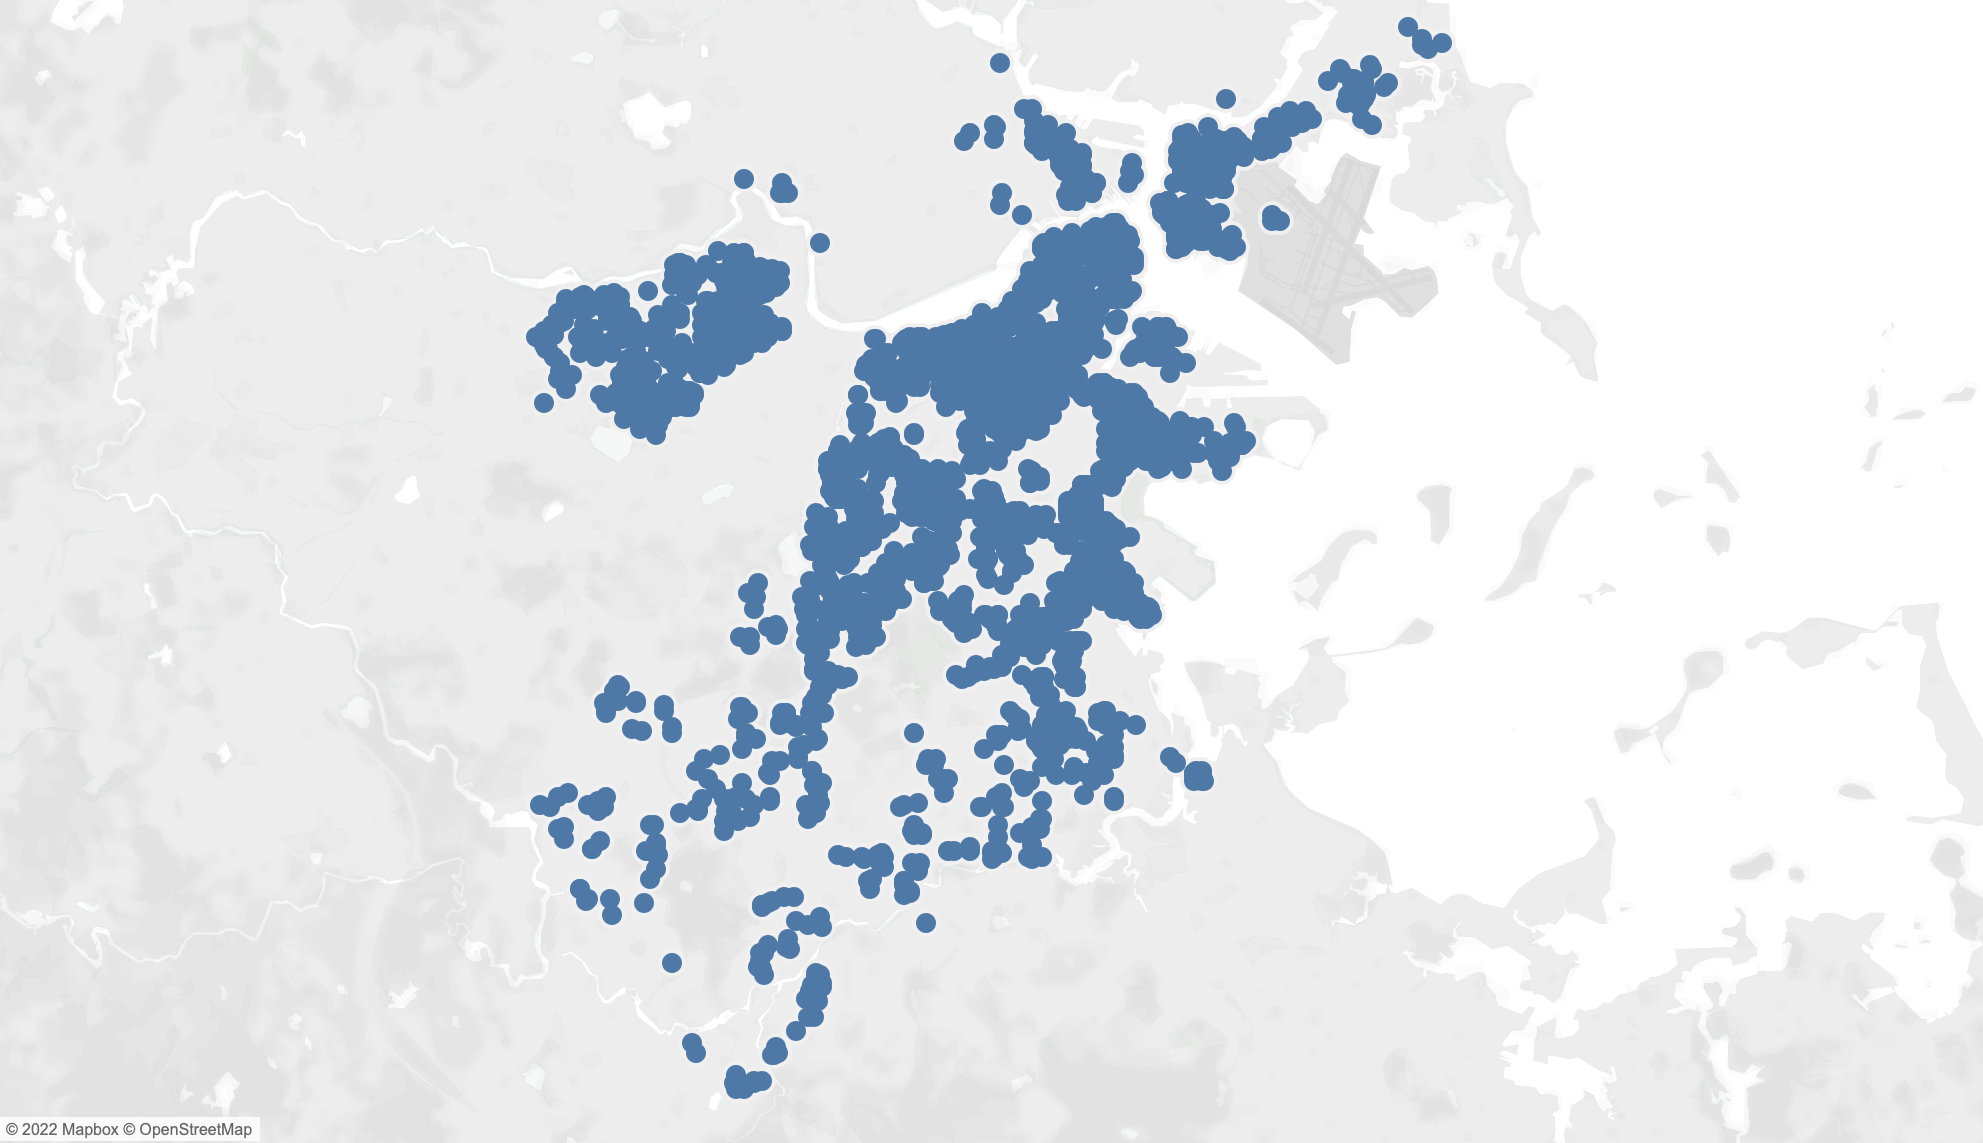

In order to set up the table, we imported the table as all *string* type fields manually, and then transformed the data type and transport them into a new table `airbnb_listing_21` with the following code:

In [1]:
%%bigquery
CREATE OR REPLACE TABLE Airbnb.airbnb_listing_21 AS
SELECT
name,
SAFE_CAST(id AS INT64) id,
SAFE_CAST(Year AS INT64) year,
Month AS month,
property_type,
room_type,
SAFE_CAST(accommodates AS INT64) accommodates,
SAFE_CAST(bathrooms AS INT64) bathrooms,
SAFE_CAST(bedrooms AS INT64) bedrooms,
SAFE_CAST(beds AS INT64) beds,
amenities,
SAFE_CAST(REGEXP_REPLACE(price, r'\$|,', '') AS FLOAT64) price,
SAFE_CAST(minimum_nights AS INT64) minimum_nights,
SAFE_CAST(maximum_nights AS INT64) maximum_nights,
calendar_updated,
SAFE_CAST(has_availability AS INT64) has_availability,
SAFE_CAST(availability_30 AS INT64) availability_30,
SAFE_CAST(availability_60 AS INT64) availability_60,
SAFE_CAST(availability_90 AS INT64) availability_90,
SAFE_CAST(availability_365 AS INT64) availability_365,
COALESCE(PARSE_DATE('%Y-%m-%d', calendar_last_scraped), PARSE_DATE('%x', calendar_last_scraped)) calendar_last_scraped,
license,
SAFE_CAST(instant_bookable AS INT64) instant_bookable,
SAFE_CAST(host_id AS INT64) host_id,
host_name,
PARSE_DATE('%Y-%m-%d', host_since) host_since,
host_location,
host_about,
host_response_time,
SAFE_CAST(REPLACE(host_response_rate, '%', '') AS FLOAT64)/100 AS host_response_rate,
SAFE_CAST(REPLACE(host_acceptance_rate, '%', '') AS FLOAT64)/100 AS host_acceptance_rate,
SAFE_CAST(host_is_superhost AS INT64) host_is_superhost,
SAFE_CAST(host_total_listings_count AS INT64) host_total_listings_count,
host_verifications,
SAFE_CAST(host_has_profile_pic AS INT64) host_has_profile_pic,
SAFE_CAST(host_identity_verified AS INT64) host_identity_verified,
SAFE_CAST(calculated_host_listings_count AS INT64) calculated_host_listings_count,
SAFE_CAST(calculated_host_listings_count_entire_homes AS INT64) calculated_host_listings_count_entire_homes,
SAFE_CAST(calculated_host_listings_count_private_rooms AS INT64) calculated_host_listings_count_private_rooms,
SAFE_CAST(calculated_host_listings_count_shared_rooms  AS INT64) calculated_host_listings_count_shared_rooms,
SAFE_CAST(number_of_reviews AS INT64) number_of_reviews,
SAFE_CAST(number_of_reviews_ltm AS INT64) number_of_reviews_ltm,
SAFE_CAST(reviews_per_month AS FLOAT64) reviews_per_month,
PARSE_DATE('%Y-%m-%d',first_review) first_review,
PARSE_DATE('%Y-%m-%d',last_review) last_review,
SAFE_CAST(review_scores_rating AS FLOAT64) review_scores_rating,
SAFE_CAST(review_scores_accuracy AS FLOAT64) review_scores_accuracy,
SAFE_CAST(review_scores_cleanliness AS FLOAT64) review_scores_cleanliness,
SAFE_CAST(review_scores_checkin AS FLOAT64) review_scores_checkin,
SAFE_CAST(review_scores_communication AS FLOAT64) review_scores_communication,
SAFE_CAST(review_scores_location AS FLOAT64) review_scores_location,
SAFE_CAST(review_scores_value AS FLOAT64) review_scores_value,
SAFE_CAST(latitude AS FLOAT64) latitude,
SAFE_CAST(longitude AS FLOAT64) longitude,
airbnb_region,
SAFE_CAST(Blk_ID_10 AS INT64) Blk_ID_10,
SAFE_CAST(BG_ID_10 AS INT64) BG_ID_10,
SAFE_CAST(CT_ID_10 AS INT64) CT_ID_10,
TOWN,
COUNTY,
bed_type,
SAFE_CAST(square_feet AS FLOAT64) square_feet,
SAFE_CAST(REGEXP_REPLACE(weekly_price, r'\$|,', '') AS FLOAT64) weekly_price,
SAFE_CAST(REGEXP_REPLACE(monthly_price, r'\$|,', '') AS FLOAT64) monthly_price,
SAFE_CAST(REGEXP_REPLACE(security_deposit, r'\$|,', '') AS FLOAT64) security_deposit,
SAFE_CAST(REGEXP_REPLACE(cleaning_fee, r'\$|,', '') AS FLOAT64) cleaning_fee,
SAFE_CAST(guests_included AS INT64) guests_included,
SAFE_CAST(REGEXP_REPLACE(extra_people, r'\$|,', '') AS FLOAT64) extra_people_fee,
SAFE_CAST(requires_license AS INT64) requires_license,
cancellation_policy,
SAFE_CAST(require_guest_profile_picture AS INT64) require_guest_profile_picture,
SAFE_CAST(require_guest_phone_verification AS INT64) require_guest_phone_verification,
SAFE_CAST(is_business_travel_ready AS INT64) is_business_travel_ready,
street,
SAFE_CAST(is_location_exact AS INT64) is_location_exact
FROM Airbnb.airbnb_listing_string
WHERE Year = '2021' AND airbnb_region = 'Boston'

Query complete after 0.01s: 100%|██████████| 3/3 [00:00<00:00, 1100.39query/s]                        


""


To prevent errors, we used the `SAFE_CAST` function instead of `CAST` to return NULL values while the `CAST` function would fail the query. Also, we used the `REGEXP_REPLACE` function to convert price values such as *price* to FLOAT64 type. During the transforming process, we found out the field `calendar_last_scraped` has different date format. Therefore, we used the `COALESCE()` function along with `PARSE_DATE` to unified the format to YYYY-MM-DD. There are fields that are irrelevant to our studies. Therefore, we did not select them in the table creation process. 

Here is the list of the not selected fields: 
* description
* neighborhood_overview
* listing_url
* picture_url
* host_url
* summary
* space
* notes
* transit
* access
* interaction
* house_rules
* host_thumbnail_url
* host_picture_url

After we got the converted table, we started to drop fields which contained all NULL values when we filtered the region as Boston and year as 2021, and we saved the table as `Airbnb.airbnb_listing_21_clean`. We used the code below to implement the dropping process.

In [53]:
%%bigquery
CREATE OR REPLACE TABLE Airbnb.airbnb_listing_21_clean AS
SELECT * EXCEPT(bathrooms, bedrooms, beds, minimum_nights, maximum_nights, calendar_updated, 
                has_availability, host_is_superhost, host_total_listings_count, 
                host_has_profile_pic, host_identity_verified, bed_type, square_feet, 
                weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, 
                extra_people_fee, requires_license, cancellation_policy, 
                require_guest_profile_picture, require_guest_phone_verification, 
                is_business_travel_ready, street, is_location_exact) 
FROM Airbnb.airbnb_listing_21

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1613.40query/s]                        


""


Ultimately, our team found out that the `review_score_rating` field is not consistent. Some of the listings have ratings out of 5, and some of them have ratings out of 100. So we decided to unify all of them in a score out of 5. We used if functions to filter the condition and put the conversion process in a bigquery VIEW which our team can customize and combine it with other functions like the `CAST` function for segmentation. We saved it as `ba775-team-b2.Airbnb.review_scores`.

Code for uniform rating score:

In [ ]:
%%bigquery
SELECT * EXCEPT(review_scores_rating), IF(review_scores_rating > 5, review_scores_rating/20, review_scores_rating) AS review_scores_rating
FROM `ba775-team-b2.Airbnb.airbnb_listing_21_clean`
WHERE review_scores_rating is not null;

Last but not least, we also created a table with the same `Create Table` function which adds `(Year = '2021' OR Year = '2020') AND (airbnb_region = 'Boston' OR airbnb_region = 'Cambridge')` in the WHERE clause. The table contains the year from 2020 to 2021 and regions with both Boston and Cambridge to conduct exploration for Question 1. The reason is that we want a broader overview of the listings in the two year period from both regions.

***
### Data Analysis

In this section, we focus on these attributes:
* <u>id</u>: an Airbnb listing's unique id number
* <u>month</u>: the month that data for this listing is collected by Inside Airbnb
* <u>year</u>: the year that data for this listing is collected by Inside Airbnb
* <u>airbnb_region</u>: the city where a listed property is located
* <u>price</u>: the price to rent the listed property for one night
* <u>review_scores_rating</u>: average overall rating score that guests assigned to the listed rental property according to Inside Airbnb
* <u>availability_365</u>: the number of available days of a listing within 365 days
* <u>room_type</u>: the room type of the listed property which includes HA(entire home/apt), HR(hotel room), PR(private room), and SR(shared room)
* <u>host_response_rate</u>: the rate at which the host responds to inquiries according to Airbnb.

#### Part 1: Data Summary

##### **1. In 2020 and 2021, what months have the most listings in both Boston and Cambridge?**
The top 3 listings in September, June, and December for both towns. and followed by January and February. We suggest Airbnb should pay more attention to these months since there might be many customer problems and requests for the customer service department. 

In [55]:
%%bigquery
SELECT month, COUNT(*) AS number_of_listing
FROM `ba775-team-b2.Airbnb.airbnb_listing_20_21`
GROUP BY month
ORDER BY number_of_listing DESC;

Downloading: 100%|██████████| 12/12 [00:00<00:00, 13.74rows/s]


,month,number_of_listing
0,September,5820
1,June,5612
2,December,5187
3,January,3847
4,February,3665
5,April,3478
6,March,3477
7,May,3309
8,October,2610
9,November,2594


##### **2. What is the average listing frequency in a year in Boston compared with Cambridge?**
The average listing frequency in a year in Boston was 178 days. Cambridge has an average listing frequency of 171 days a year, which is slightly lower than Boston. In this dataset, both Boston and Cambridge fit the 87 average nights booked in a year according to Inside Airbnb.

In [2]:
%%bigquery
SELECT airbnb_region, ROUND(AVG(availability_365),2) AS avg_listing
FROM `ba775-team-b2.Airbnb.airbnb_listing_21_clean`
WHERE airbnb_region = 'Boston' 
    AND availability_365 IS NOT NULL
GROUP BY airbnb_region
ORDER BY avg_listing DESC;

Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.09rows/s]


,airbnb_region,avg_listing
0,Boston,177.98


##### **3. What is the average listing rent per night in 2021 in Boston?**
The average rent in Boston in 2021 was \\$175 per night. In 2021, the average rent globally was \\$137 per night and the average rent in the United States was \\$216 per night. Moreover, in 2021, the average rent in New York City was \\$143 per night and the average rent in Washington D.C. is $147 per night. Based on this dataset and AllTheRooms, Boston has a lower average rent price per night than the nation’s average, but still higher than most of the cities' average.

In [33]:
%%bigquery
SELECT year, ROUND(AVG(price),2) AS avg_rent
FROM `ba775-team-b2.Airbnb.airbnb_listing_21_clean`
WHERE airbnb_region = 'Boston' 
    AND price IS NOT NULL
GROUP BY year
ORDER BY avg_rent DESC;

Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.19rows/s]


,year,avg_rent
0,2021,175.07


##### **4. How many listings have an overall rating of 5?** 
There are 988 out of 6349 listings with the highest overall rating score of 5 in Boston. Only about 16% of listings have an overall rating score of 5 suggests that guests are not satisfied with Boston’s Airbnb in general. There is room for Boston households to improve and attract more customers.

In [1]:
%%bigquery
SELECT MAX(review_scores_rating) AS highest_score, COUNT(*) AS number_of_listings
FROM `ba775-team-b2.Airbnb.review_scores`
WHERE review_scores_rating = 5
GROUP BY review_scores_rating
ORDER BY number_of_listings DESC;

Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.16rows/s]


,highest_score,number_of_listings
0,5.0,988


<center>Graph 2: Number of Listings with Rating Score of 5 in the Sample Population
    
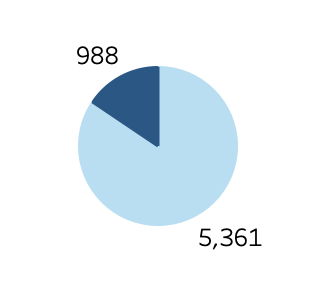

#### Part 2: Data Exploring
In this section, we want to focus on fields that have effected on the `review_scores_rating` field. 

##### **1. What is the availability in 365’s effect on average overall rating score?**
Availability_365 indicates the number of available days of the house within 365 days. Availability_365 indicates the number of available days of the house within 365 days. The table indicates that rooms that are available between 100-300 tend to have higher average overall rating score while rooms with higher availability or lower availability might have lower rating score.

In [2]:
%%bigquery
With sub AS 
(SELECT CASE
            WHEN availability_365 >= 300 THEN 'greater than 300'
            WHEN availability_365 >= 200 AND availability_365 < 300 THEN 'between 300 and 200'
            WHEN availability_365 >= 100 AND availability_365 < 200 THEN 'between 200 and 100'
            WHEN availability_365 > 0 THEN 'less than 100'
            ELSE 'Unknown'
        END AS availability_365, 
        review_scores_rating
FROM `ba775-team-b2.Airbnb.review_scores`
WHERE availability_365 > 0)

SELECT availability_365, ROUND(AVG(review_scores_rating),2) AS avg_review_score
FROM sub
GROUP BY availability_365
ORDER BY avg_review_score DESC;

Downloading: 100%|██████████| 4/4 [00:00<00:00,  4.37rows/s]


,availability_365,avg_review_score
0,between 200 and 100,4.69
1,between 300 and 200,4.68
2,less than 100,4.64
3,greater than 300,4.61


<center>Graph 3: Average Rating Score by Listings' Availability in a Year
    
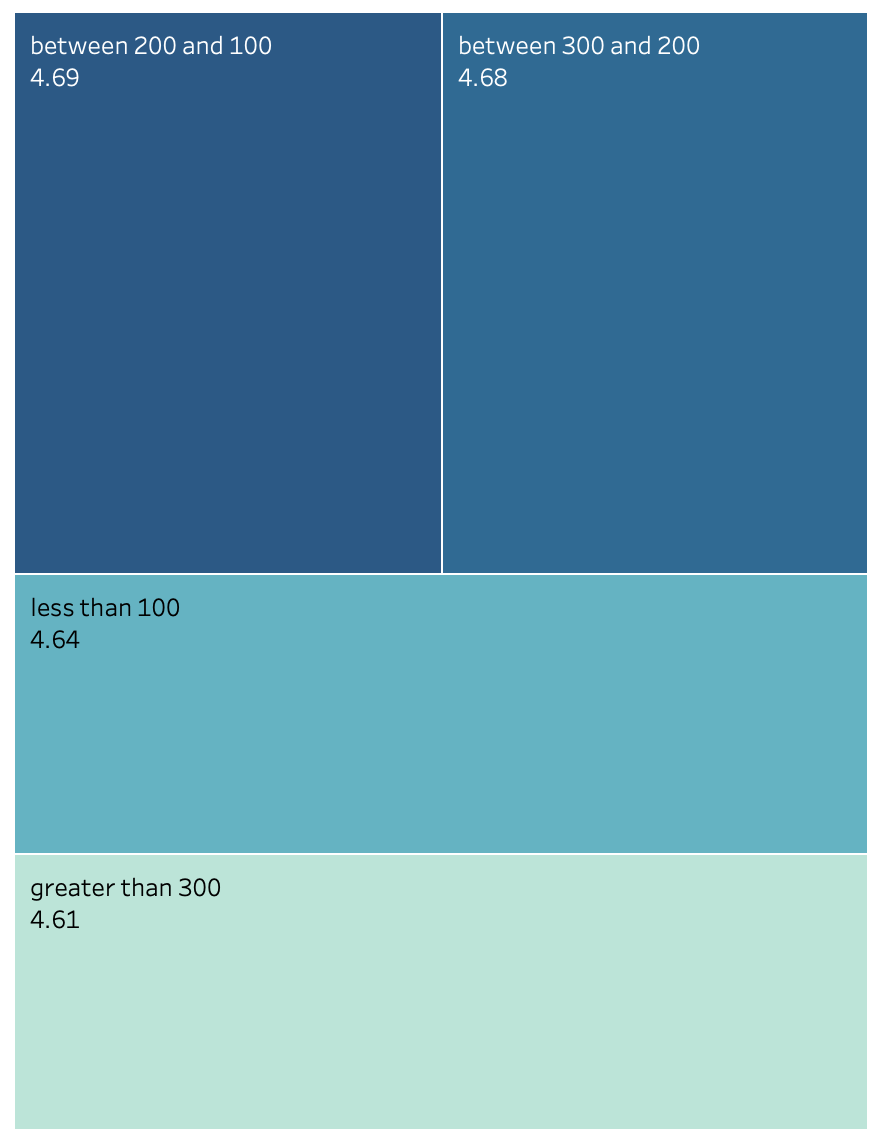

##### **2. What is the average overall rating score for each room type?**
Among the four room types, SR (shared room) has the highest average overall rating. However, the average score for SR (shared rooms) and HR (hotel rooms) could be biased since the sample size is too small. The HA (entire room/apt) is the most popular room type with a high average rating score.

In [3]:
%%bigquery
SELECT room_type, ROUND(AVG(review_scores_rating),2) AS avg_score_rating, COUNT(id) AS room_count
FROM `ba775-team-b2.Airbnb.review_scores`
GROUP BY room_type
ORDER BY avg_score_rating DESC;

Downloading: 100%|██████████| 4/4 [00:00<00:00,  4.36rows/s]


,room_type,avg_score_rating,room_count
0,SR,4.78,15
1,HR,4.71,40
2,HA,4.65,2713
3,PR,4.62,1827


<center>Graph 4: Average Rating Score by Room Types

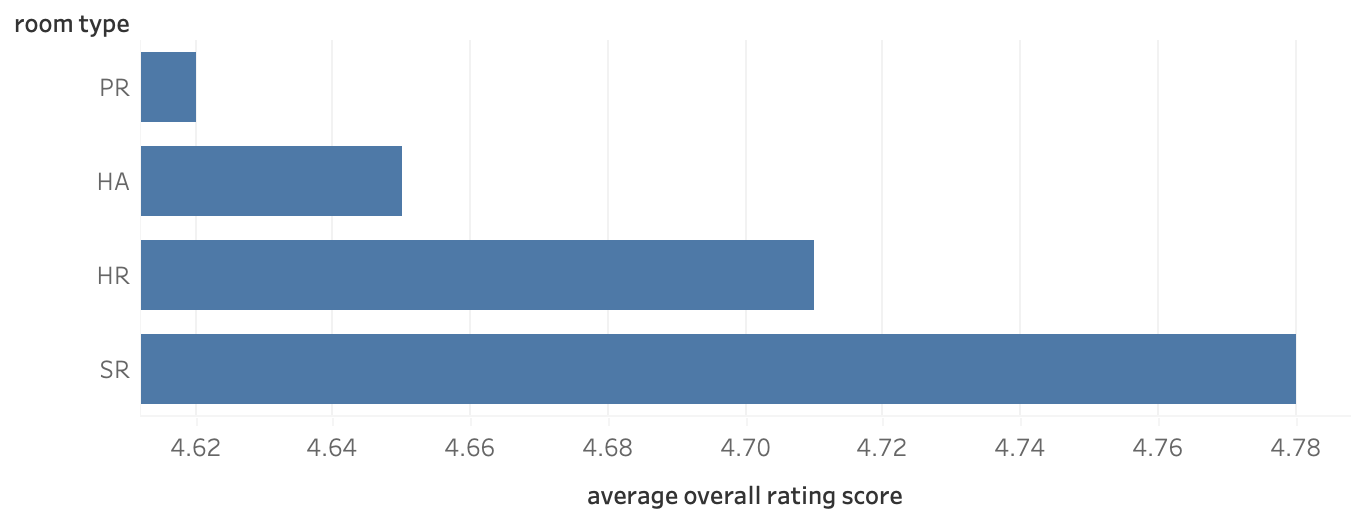

##### **3. How does the hosts’ response rate impact on average overall rating score?**
Host response rate indicates the rate at which the host responds to inquiries according to Airbnb. The result implies that listings with hosts that respond to inquiries more recurrently would generally gain a higher average overall rating score.

In [4]:
%%bigquery
With sub AS 
(SELECT CASE
            WHEN host_response_rate >= 0.75 THEN 'greater than 0.75'
            WHEN host_response_rate >= 0.5 AND host_response_rate < 0.75 THEN 'between 0.75 and 0.50'
            WHEN host_response_rate >= 0.25 AND host_response_rate < 0.5 THEN 'between 0.50 and 0.25'
            WHEN host_response_rate > 0 THEN 'less than 0.25'
            ELSE 'Unknown'
        END AS host_response_rate, 
        review_scores_rating
FROM `ba775-team-b2.Airbnb.review_scores`
WHERE host_response_rate > 0)

SELECT host_response_rate, ROUND(AVG(review_scores_rating),2) AS avg_review_score
FROM sub
GROUP BY host_response_rate
ORDER BY avg_review_score DESC;

Downloading: 100%|██████████| 4/4 [00:00<00:00,  4.45rows/s]


,host_response_rate,avg_review_score
0,greater than 0.75,4.67
1,between 0.75 and 0.50,4.60
2,between 0.50 and 0.25,4.52
3,less than 0.25,4.39


<center>Graph 5: Host Response Rate by Average Rating Score
    
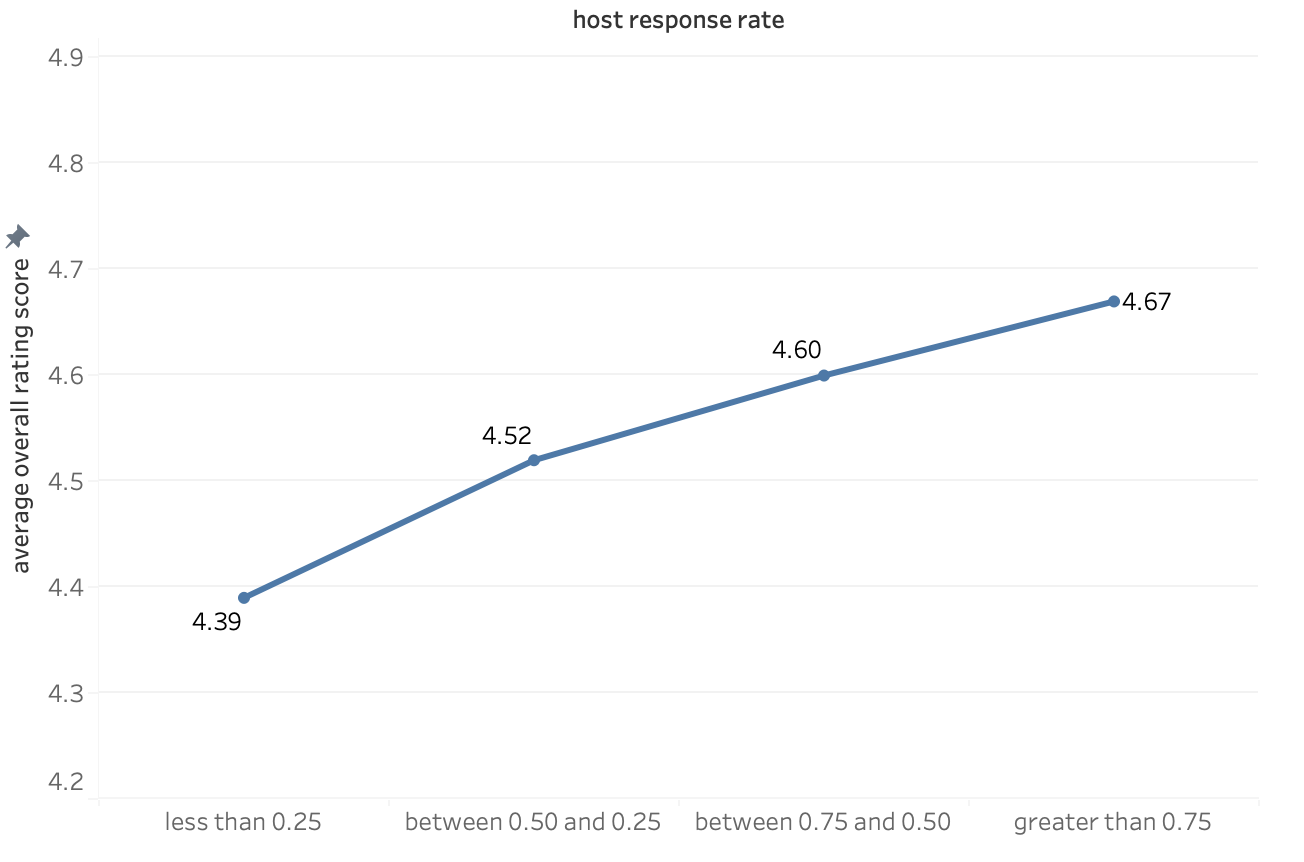

##### **4. How does accommodates affect listings' average overall rating score?**
As for the number of occupants allowed in the rental listing, the top four highest average score listings have accommodated above ten. This result implies that as more people the listing property allows to stay in the stay period, the higher the review score the customer will give.

In [1]:
%%bigquery
With sub AS 
(SELECT CASE
            WHEN accommodates >= 12 THEN 'greater than 12'
            WHEN accommodates >= 8 AND accommodates < 12 THEN 'between 12 and 8'
            WHEN accommodates >= 4 AND accommodates < 8 THEN 'between 8 and 4'
            WHEN accommodates > 0 THEN 'less than 4'
            ELSE 'Unknown'
        END AS accommodates, 
        review_scores_rating
FROM `ba775-team-b2.Airbnb.review_scores`
WHERE accommodates > 0)

SELECT accommodates, ROUND(AVG(review_scores_rating),2) AS avg_score_rating
FROM sub
GROUP BY accommodates
ORDER BY avg_score_rating DESC;

Downloading: 100%|██████████| 4/4 [00:00<00:00,  4.70rows/s]


,accommodates,avg_score_rating
0,greater than 12,4.80
1,between 12 and 8,4.73
2,between 8 and 4,4.69
3,less than 4,4.61


<center>Graph 6: Number of Accomodates Allowed by Average Rating Score 

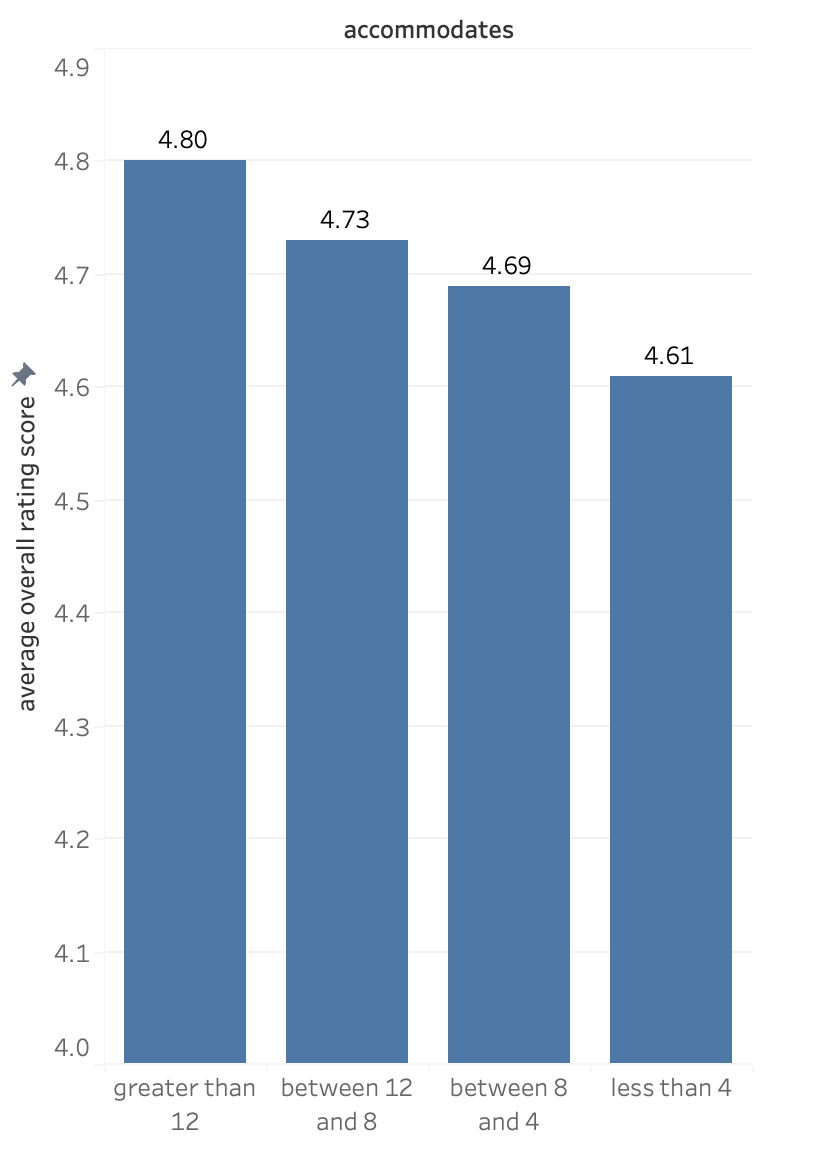

***
### Logistic Regression
#### Part 1: Preparation
We conducted a basic logistic regression classification model in BigQuery with coloumns which contains the fields we discussed above. The fields are: 
* accommodates
* price
* availability_365
* host_response_rate
* room_type
* number_of_reviews
* instant_bookable

Before we started modeling, we created a test table with our `airbnb_listing_20_21` table from Q1 and created a test table called `20_test` with only listings from 2020. We used the following query to create the test table:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE Airbnb.20_test AS
SELECT * EXCEPT(review_scores_rating), 
  IF(review_scores_rating > 5, review_scores_rating/20, review_scores_rating) AS review_scores_rating,
FROM `ba775-team-b2.Airbnb.airbnb_listing_20_21`
WHERE review_scores_rating is not null
  AND year = 2020;

Then, we created two views with a `score_5` field to classify if a listing has a review score of 5 for both the training and testing table. We used the following query to create the view: 

In [ ]:
%%bigquery
SELECT *,
  IF(review_scores_rating = 5, 1, 0) AS score_5
FROM `ba775-team-b2.Airbnb.airbnb_listing_21_clean`
WHERE review_scores_rating is not null;

In [ ]:
%%bigquery
SELECT *, 
  IF(review_scores_rating = 5, 1, 0) AS score_5
FROM `ba775-team-b2.Airbnb.20_test`
WHERE review_scores_rating is not null;

#### Part 2: Modeling & Evaluating
As for the *room_type* field, we assigned numbers from 1 to 4 with the `CASE` function to each represent the four types of room types that appeared in the dataset(1: PR, 2: HA, 3: SR, 4: HR). We used the following query to create and train the model:

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL `Airbnb.classification_model`
OPTIONS(model_type='logistic_reg', labels = ['score_5'])
AS
SELECT accommodates, price, availability_365, host_response_rate, number_of_reviews, instant_bookable, score_5,
  CASE
          WHEN room_type = 'PR' THEN 1
          WHEN room_type = 'HA' THEN 2
          WHEN room_type = 'SR' THEN 3
          WHEN room_type = 'HR' THEN 4
          ELSE 0
      END AS room_type, 
FROM `ba775-team-b2.Airbnb.regression`;

After the training is complete, we run this query to evaluate the model's performance using `ML.EVALUATE`:

In [ ]:
%%bigquery
SELECT *
FROM ML.EVALUATE
(
    MODEL Airbnb.classification_model,  
    (SELECT accommodates, price, availability_365, host_response_rate, number_of_reviews, instant_bookable, score_5,
      CASE
          WHEN room_type = 'PR' THEN 1
          WHEN room_type = 'HA' THEN 2
          WHEN room_type = 'SR' THEN 3
          WHEN room_type = 'HR' THEN 4
          ELSE 0
      END AS room_type, 
FROM `ba775-team-b2.Airbnb.regression`)
);

The next step we tested our model with the `20_test` table, and created an output table `prediction` with the following query:

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE Airbnb.prediction
AS
SELECT predicted_score_5, 
    predicted_score_5_probs[OFFSET(0)].prob,
    score_5
FROM ML.PREDICT
(
    MODEL `Airbnb.classification_model`,
    (SELECT accommodates, price, availability_365, host_response_rate, number_of_reviews, instant_bookable, score_5,
      CASE
          WHEN room_type = 'PR' THEN 1
          WHEN room_type = 'HA' THEN 2
          WHEN room_type = 'SR' THEN 3
          WHEN room_type = 'HR' THEN 4
          ELSE 0
      END AS room_type, 
FROM `ba775-team-b2.Airbnb.test_dataset`), 
    STRUCT(0.2981 AS threshold)
)
ORDER BY prob DESC;

#### Part 3: Testing Result

Lastly, we ran the following query to check our testing result:

In [2]:
%%bigquery
SELECT 
    COUNT(*) total_listings,
    COUNTIF(score_5=1) actual_purchases, 
    COUNTIF(score_5=1)/COUNT(*)*100 rate_percent,
    COUNTIF(predicted_score_5=1) pridicted_positive,
    COUNTIF(score_5=1 AND predicted_score_5=1) true_positive,
    COUNTIF(score_5=1 AND predicted_score_5=1)/COUNTIF(predicted_score_5=1)*100 rate_percent_predicted
FROM `ba775-team-b2.Airbnb.prediction`;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.06s/rows]


,total_listings,actual_purchases,rate_percent,pridicted_positive,true_positive,rate_percent_predicted
0,26628,5509,20.688749,7770,3870,49.80695


In this logistic regression classification model, we got a 78.43% accuracy, 41.81% of log loss, and 85.09% ROC accuracy which is a decent result for a basic model without tuning. Out of 7770 positive predictions, 3870 of them actually have a review score of 5. It is 49.81% of the listings which is more than doule of our baseline. However, we do not recommend using this model for future listing prediction because the log-loss value is too high. One of the reasons we thought of this is the training table is unbalanced, with only 16% of listings having a review score of 5. In future studies, we suggest implementing undersampling or oversampling methods and other tuning methods to balance out the dataset before putting the data in a model. 

***
### Conclusion
By conducting data analysis, we were able to explore what characteristics of a Boston household would lead to higher reliability and popularity. We used the average overall rating score as a key indicator of reliability and popularity. We found that there are four positive associations with the average overall rating score. Higher availability in a year, a higher hosts’ response rate, and a higher number of occupants all lead to a higher average overall rating score. In addition, the room type of SR (shared room) also leads to a higher average overall rating score. With a more complete logistic regression model, we believe our discovery can help Airbnb attract more customers, build a higher reputation, and boost its future sales.
***
### References
1. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GXLZXF 
2. https://www.alltherooms.com/analytics/average-airbnb-prices-by-city/
3. http://insideairbnb.com/boston/ 
4. https://www.forbes.com/sites/lealane/2020/06/09/how-bad-are-covid-19-pandemic-effects-on-airbnb-guests-hosts/?sh=270b73557432
5. https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook

***
### Dashboard Overview
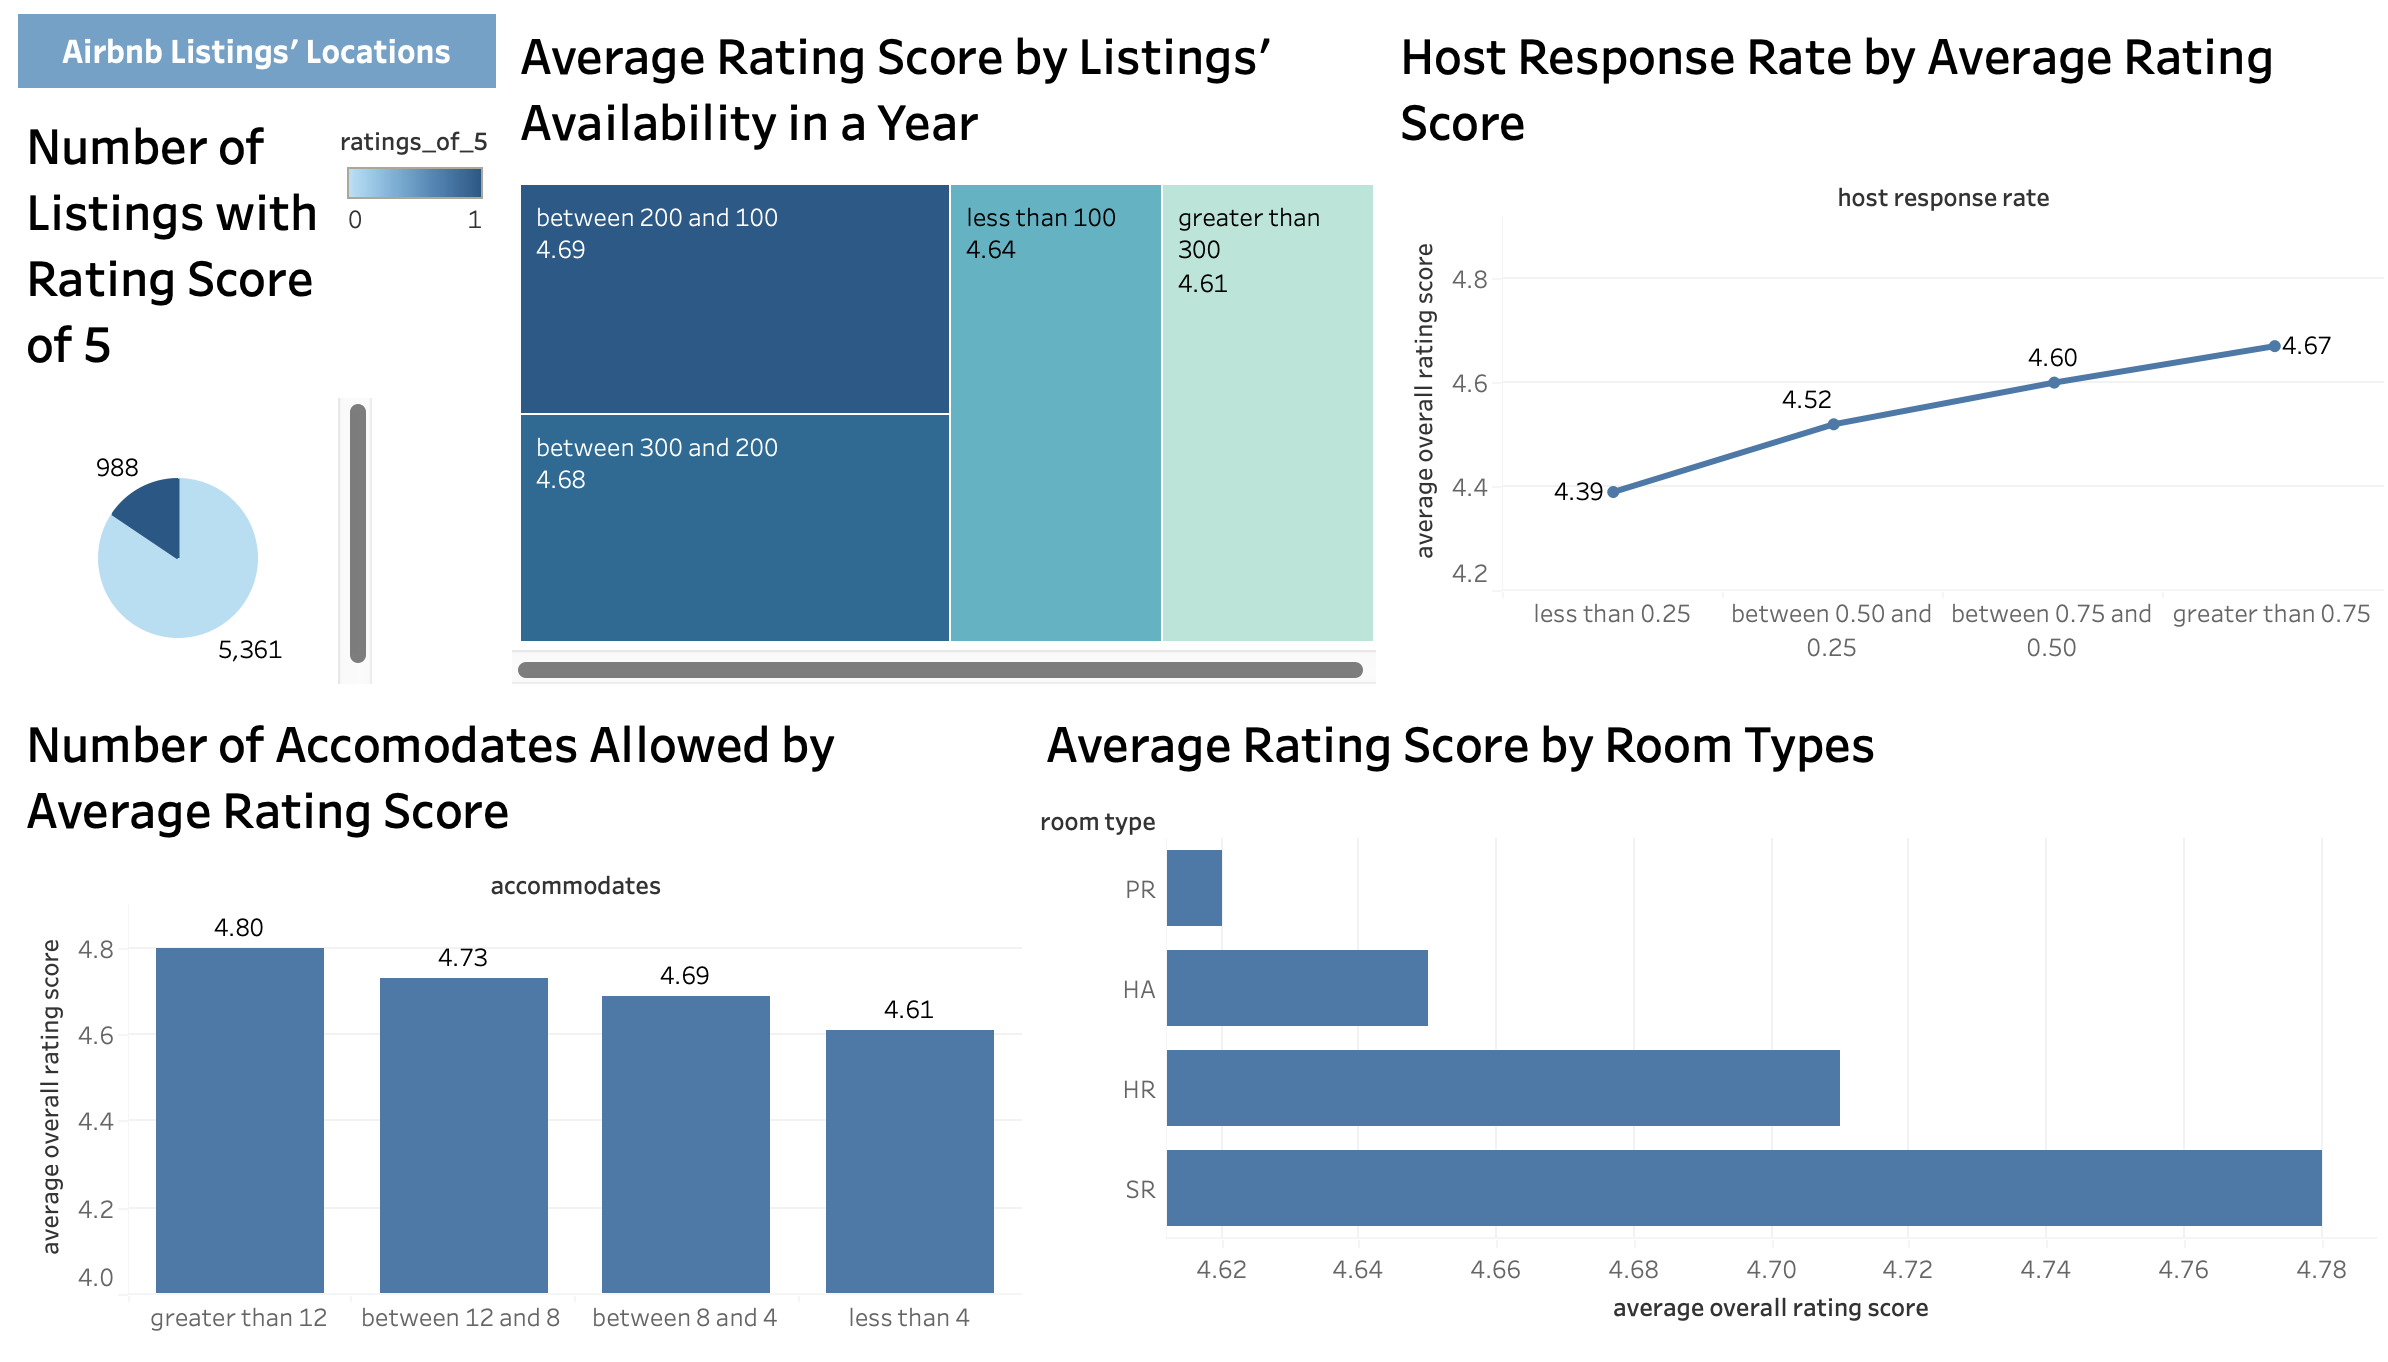

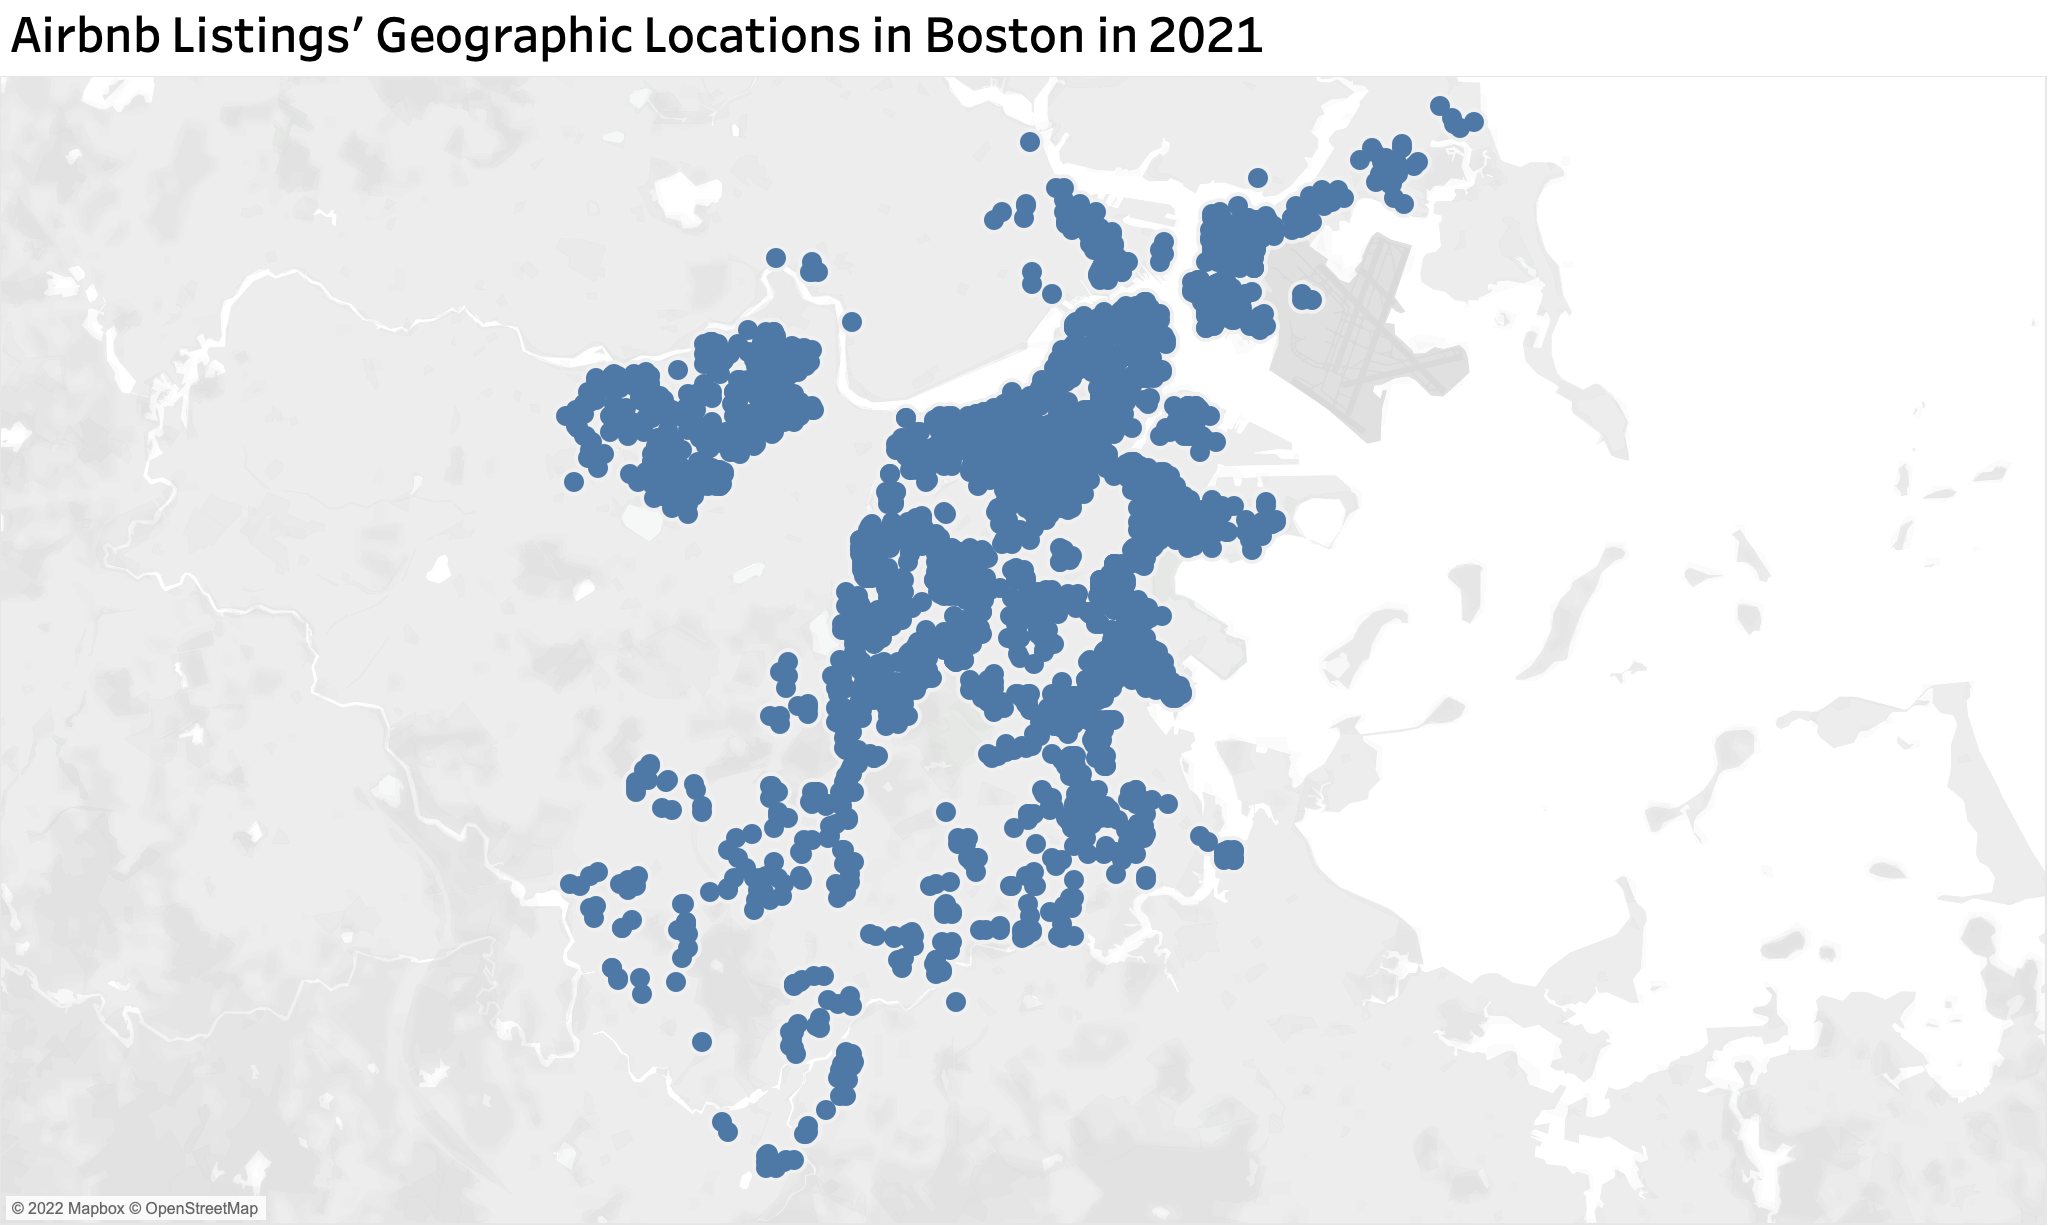

Dashboard Link: https://public.tableau.com/views/AnalysisofAirbnbListings1/AirbnbListingsAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link
